In [241]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
import os

#### Using fft.dct

In [216]:
from scipy import fft
test = fft.dct([1, 2, 3, 4], 2, norm='ortho') # Use SciPy

In [217]:
test

array([ 5.        , -2.2304425 ,  0.        , -0.15851267])

#### Build 1D-DCT II Function

In [218]:
def dct(data):
    N = len(data)
    f = 0
    cof = np.zeros(N)
    for k in range(N):
        if k==0:
            f = math.sqrt(1/(4*N))
        else:
            f = math.sqrt(1/(2*N))

        s = 0
        for n in range(N):
            out = data[n] * math.cos((math.pi*k) / (2*N) * (2*n+1))
            s = s + out
        cof[k] = 2 * f * s
        
    return np.around(cof, decimals=7)

In [219]:
data = np.array([1,2, 3, 4])
data

array([1, 2, 3, 4])

In [220]:
output = dct(data)
output

array([ 5.       , -2.2304425, -0.       , -0.1585127])

#### Data-1D -> Signal 

In [303]:
data1D = np.random.randint(256, size=1024)
data1D

array([226,  56,  29, ..., 134,  95, 148])

In [304]:
N1D = len(data1D)
index1D = np.arange(N1D)
index1D

array([   0,    1,    2, ..., 1021, 1022, 1023])

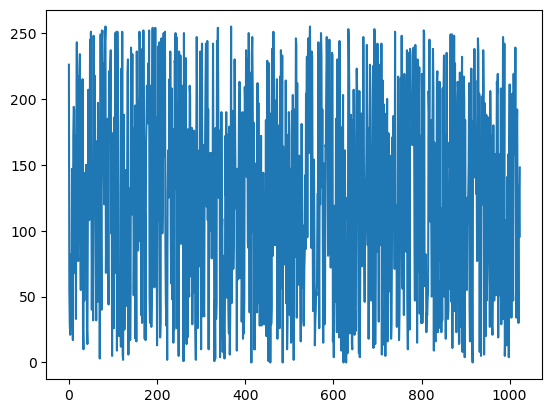

In [305]:
plt.plot(index1D, data1D)

In [306]:
output1D = dct(data1D)
output1D

array([4031.625    ,   56.9853292,   60.0959808, ...,  -64.0923966,
         42.4990104,  141.2724983])

In [307]:
o1D = fft.dct(data1D, norm='ortho') # Use SciPy
o1D

array([4031.625     ,   56.98532922,   60.09598075, ...,  -64.09239656,
         42.49901045,  141.27249831])

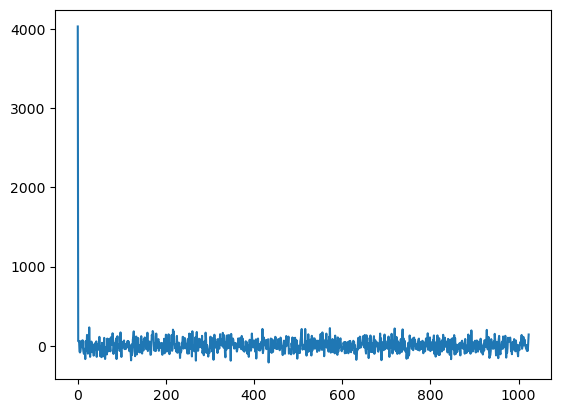

In [308]:
plt.plot(index1D, output1D)

#### Inverse 1D-DCT II Function

In [309]:
def idct(cof):
    N = len(cof)
    data = np.zeros(N)
    for k in range(N):
        s = 0
        for n in range(1, N):
            out = cof[n] * math.cos(math.pi/(2*N)*((2*k)+1)*n)
            s = s + out
        data[k] = (cof[0]/math.sqrt(N)) + (math.sqrt(2/N)*s)
        
    return np.around(data, decimals=7)

In [310]:
output1D_i = idct(output1D)
output1D_i

array([226.,  56.,  29., ..., 134.,  95., 148.])

In [311]:
o1D_i = fft.idct(output1D, norm='ortho') # Use SciPy
o1D_i

array([226.        ,  55.99999998,  28.99999997, ..., 133.99999999,
        94.99999999, 148.00000002])

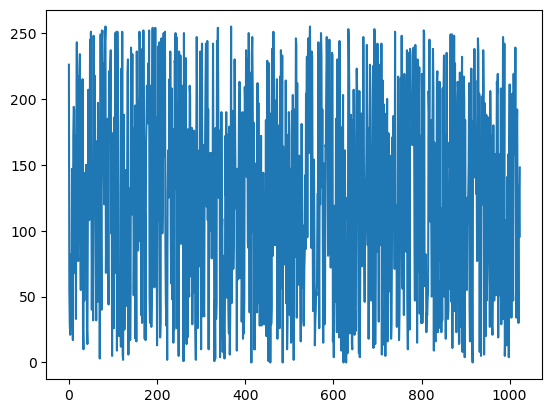

In [312]:
plt.plot(index1D, output1D_i)

In [313]:
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg'

In [314]:
wpath = os.chdir('C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg')
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg'

#### Read Grayscale Image

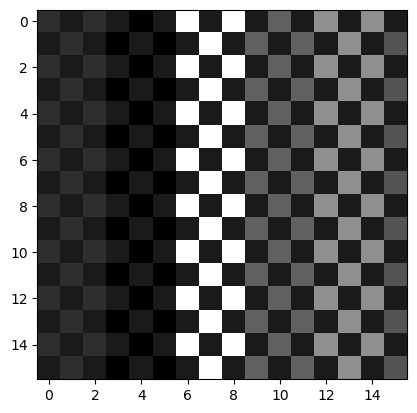

In [315]:
l1 = 'Grayscale'
path = os.path.join(cpath, l1)
imlist = os.listdir(path)
impath = os.path.join(path, imlist[0])

gArr = cv.imread(impath, cv.IMREAD_GRAYSCALE)
plt.imshow(gArr, cmap='gray')

In [316]:
gArr

array([[ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  6

In [317]:
gArr.shape

(16, 16)

In [323]:
index_dim = np.arange(16)
index_dim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

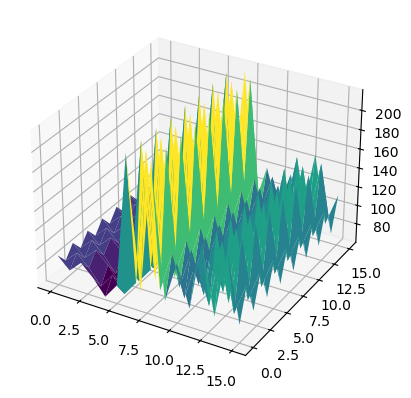

In [327]:
X, Y = np.meshgrid(index_dim, index_dim)
Z = gArr
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap='viridis', zorder=0)

#### Build 2D-DCT II Function

#### Inverse 2D-DCT II Function